In [5]:
#Linear Regression
#DataSet:seaborn tips
#simple linear Regression
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=sns.load_dataset("tips")

In [7]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


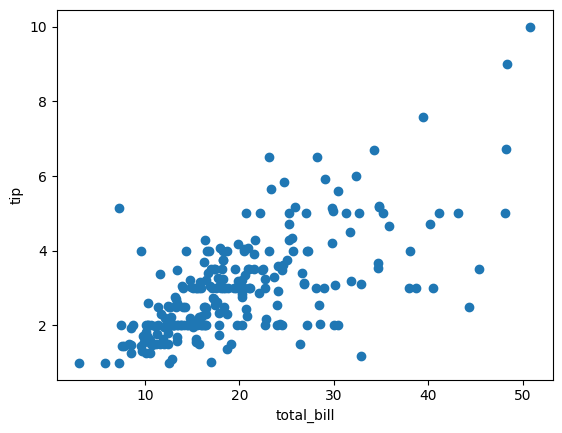

In [9]:
#relationship check
plt.scatter(df["total_bill"],df["tip"])
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.show()

#1.As the bill increases tip increases
#2.Relation =st.line(we can use linear regression)


In [10]:
#4.Feature & Target Separation

x=df[["total_bill"]] #Feature i/p in 2d only
y=df["tip"] #Feature o/p 1d


In [11]:
#5.Train- test split
#A model must perform well on unseen data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
#Feature standardization
#1.compare the co-efficients fairly
#2.Avoid the dominance of large values
#3.Prepare for Ridge/Lasso
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Note:
1.Fit only on training data
2.Prevents the data leakage

In [17]:
#Train Linear Regression Model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)
print("Co-efficient(m):",model.coef_[0])
print("Intercept(c):",model.intercept_)
y_pred=model.predict(x_test_scaled)

Co-efficient(m): 0.9357171400271824
Intercept(c): 3.0877948717948724


In [18]:
#Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(y_test,y_pred)
print("R2 score:",r2)
mse=mean_squared_error(y_test,y_pred)
print("MSE:",mse)
rmse=np.sqrt(mse)
print("RMSE:",rmse)


R2 score: 0.5449381659234664
MSE: 0.5688142529229537
RMSE: 0.7541977545199626


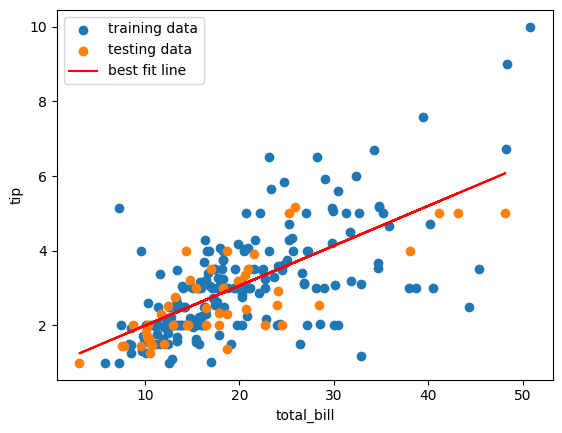

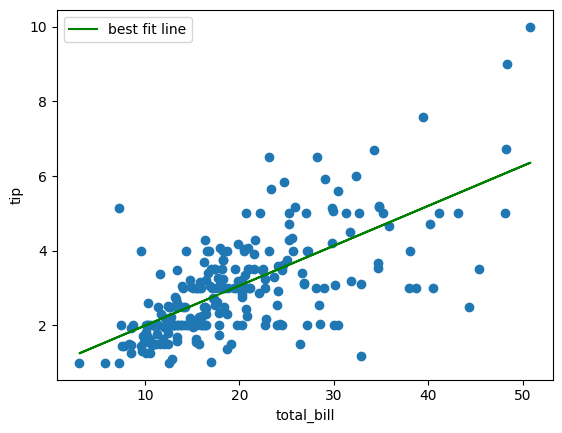

In [20]:
#visualize the best fit line
plt.scatter(x_train,y_train,label="training data")
plt.scatter(x_test,y_test,label="testing data")
plt.plot(x_test,y_pred,color="red",label="best fit line")
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.legend()
plt.show()

plt.scatter(x,y)
plt.plot(x,model.predict(scaler.transform(x)),color="green",label="best fit line")
plt.xlabel("total_bill")
plt.ylabel("tip")
plt.legend()
plt.show()

In [21]:
#i/p , o/p real time
bill_amount=float((input("Enter the bill amount:")))
bill_scalled=scaler.transform([[bill_amount]])
tip_amount=model.predict(bill_scalled)
print("Predicted tip amount:",tip_amount[0])

Enter the bill amount:30
Predicted tip amount: 4.134146764137654


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
